In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [3]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


## Task 2: Generate Descriptive Statistics and Visualizations

### 2.1 For the "Median value of owner-occupied homes" provide a boxplot

[Text(0.5, 1.0, 'Median value of owner-occupied homes'),
 Text(0.5, 0, 'MEDV'),
 Text(0, 0.5, "$1000's")]

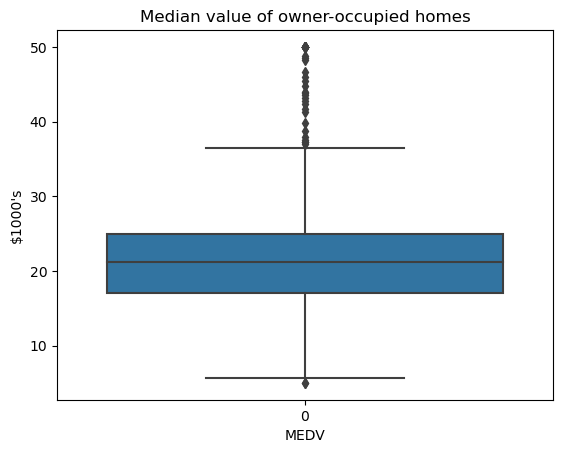

In [4]:
sns.boxplot(boston_df["MEDV"]).set(title='Median value of owner-occupied homes',xlabel="MEDV", ylabel="$1000's")

Answer: From the above boxplot, we can see that the median of the median value of owner-occupied homes is around \\$21000, and a typical neigborhood’s median value of owner-occupied homes is between \\$27000 and \\$15000. And a neigborhood with median value of owner-occupied homes above \\$40000 is outlier.

### 2.2 Provide a  bar plot for the Charles river variable

<Axes: title={'center': 'Charles river variable'}, xlabel='tract bounds river', ylabel='count of neigborhoods'>

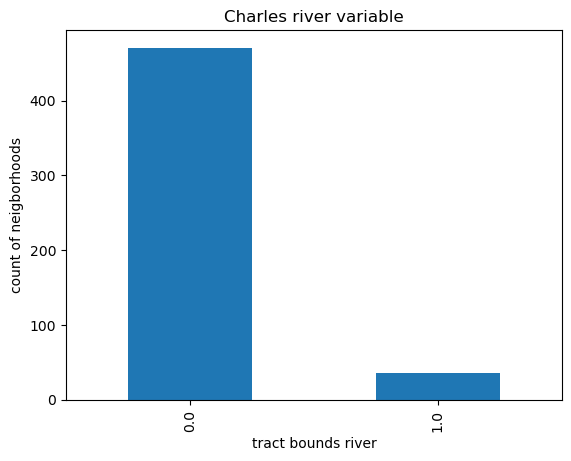

In [5]:
boston_df.CHAS.value_counts().plot(kind='bar', title = "Charles river variable", xlabel ="tract bounds river", ylabel="count of neigborhoods")

Answer: From above graph we can tell that, most neigborhoods (more than 400) in Bonston in the dataset does not have a tract that bounds river and only less than 50 neigborhoods has a tract that hounds river.

[Text(0.5, 1.0, 'Median value of owner-occupied homes (Charles river variable)'),
 Text(0.5, 0, 'tract bounds river'),
 Text(0, 0.5, "$1000's")]

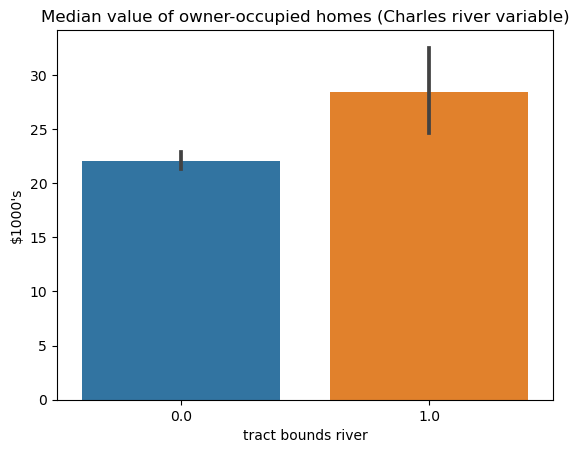

In [6]:
sns.barplot(boston_df, x="CHAS", y="MEDV").set(title='Median value of owner-occupied homes (Charles river variable)', 
                                               xlabel="tract bounds river",ylabel="$1000's")

### 2.3 Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [7]:
boston_df["Discretized_AGE"] = np.where(boston_df["AGE"]>=70, "70 years and older", 
                                        np.where(boston_df["AGE"]<=35, "35 years and younger",
                                                np.where((boston_df["AGE"]>35)&(boston_df["AGE"]<70), "between 35 and 70 years",
                                                         boston_df["AGE"])))

In [8]:
boston_df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,Discretized_AGE
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,between 35 and 70 years
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7,between 35 and 70 years
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9,between 35 and 70 years
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1,70 years and older
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5,70 years and older
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9,70 years and older


[Text(0.5, 1.0, 'Median value of owner-occupied homes by age group'),
 Text(0.5, 0, 'Discretized_AGE'),
 Text(0, 0.5, "$1000's")]

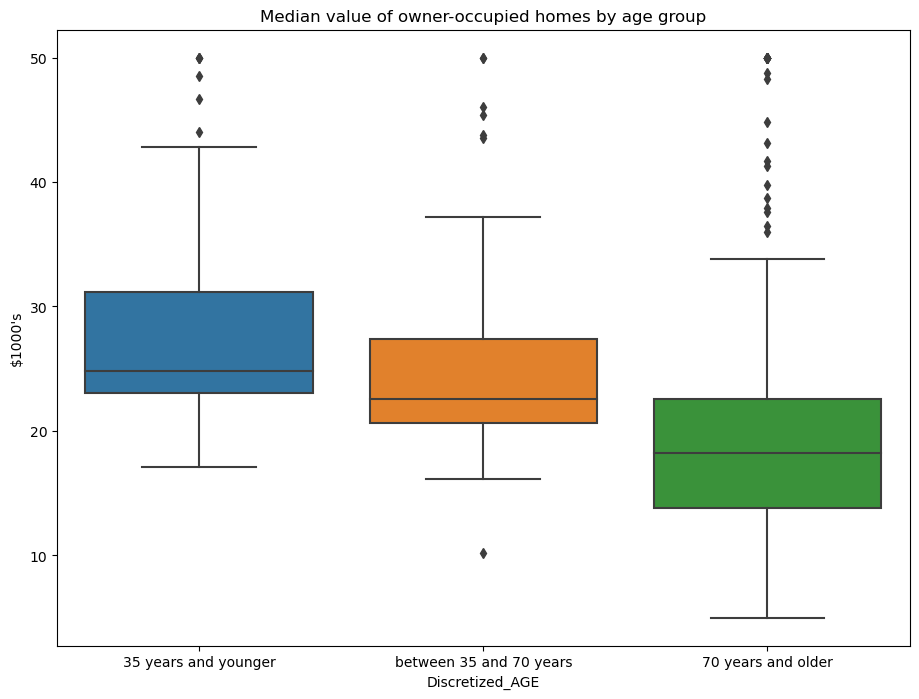

In [9]:
dims = (11, 8)
fig, ax = plt.subplots(figsize=dims)

sns.boxplot(boston_df, x = "Discretized_AGE", y="MEDV", order = ["35 years and younger","between 35 and 70 years","70 years and older"]
           ).set(title='Median value of owner-occupied homes by age group',xlabel="Discretized_AGE", ylabel="$1000's")

Answer: Shown as above graph, the median of median value of owner-occupied homes with 35 years and younger is the highest, following by the median of median value of owner-occupied homes between 35 and 70 years and last is the meidan of median value of owner-occupied homes with 70 years and older.

### 2.4 provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

<Axes: xlabel='NOX', ylabel='INDUS'>

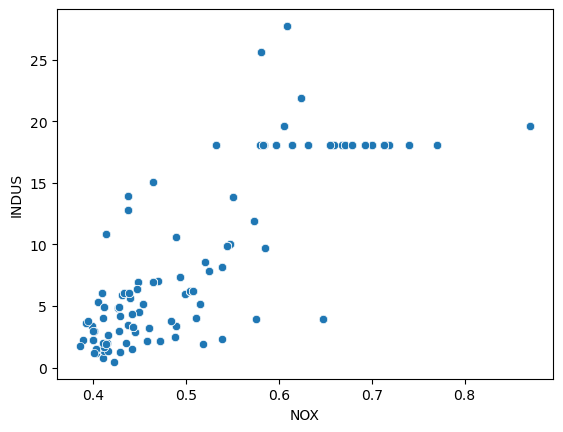

In [10]:
sns.scatterplot(boston_df, x="NOX", y="INDUS")

Answer: From the scatter plot, we can conclude that higher nitric oxide concentrations is associated with higher proportion of non-retail business acres per town.

### 2.5 Create a histogram for the pupil to teacher ratio variable

Text(0, 0.5, 'count of neigborhoods')

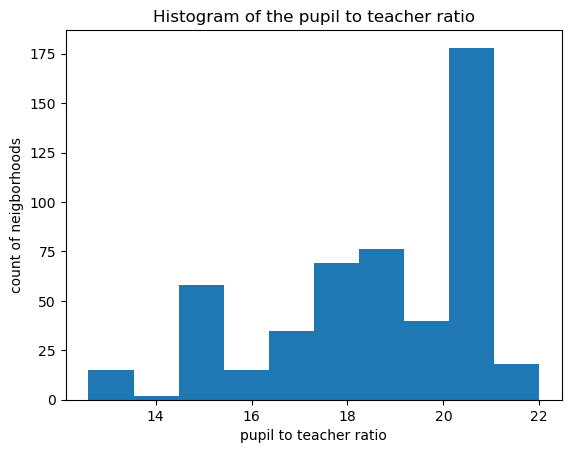

In [11]:
plt.hist(boston_df["PTRATIO"])
plt.title("Histogram of the pupil to teacher ratio")
plt.xlabel("pupil to teacher ratio")
plt.ylabel("count of neigborhoods")

Answer: From above histogram, we can see that most neigborhoods in the dataset have pupil to teacher ratio between 17 to 21.

## Task 3: Use the appropriate tests to answer the questions provided.

### task 3.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null hypothesis: there is no significant difference in median value of houses bounded by charles river or not.

In [12]:
median_value_bounded_by_charles_river = boston_df[boston_df["CHAS"]==1]["MEDV"]
median_value_not_bounded_by_charles_river = boston_df[boston_df["CHAS"]==0]["MEDV"]

In [13]:
t_statistic, p_value = stats.ttest_ind(median_value_bounded_by_charles_river,median_value_not_bounded_by_charles_river)

In [14]:
p_value

7.390623170519905e-05

Answer: Since p_value is smaller than the 0.025, we can reject the null hypothesis and conclude that there is significant difference in median value of houses bounded by charles river or not.

### task 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [18]:
group_1 = boston_df[boston_df["Discretized_AGE"]=="70 years and older"]["MEDV"]
group_2 = boston_df[boston_df["Discretized_AGE"]=="35 years and younger"]["MEDV"]
group_3 = boston_df[boston_df["Discretized_AGE"]=="between 35 and 70 years"]["MEDV"]

Null hypothesis: there is no difference in Median values of houses of each proportion of own occupied units built prior to 1940

In [19]:
statistic, p_value = stats.f_oneway(group_1, group_2, group_3)

In [20]:
p_value

1.7105011022702984e-15

Answer: since p_value is smaller than 0.05, we can reject null hypothesis and conclude that there is a difference in Median values of houses for at least 1 group porportion of owner occupied units build prior to 1940

### task 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null hypothesis: there is no linear relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [21]:
correlation_coefficient, p_value = stats.pearsonr(boston_df["NOX"], boston_df["INDUS"])

In [23]:
correlation_coefficient

0.7636514469209151

In [22]:
p_value

7.913361061239527e-98

Answer: since p_value is smaller than 0.025, we can reject null hypothesis and conclude that there is a positive relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

### task 3.4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Null hypothesis: there is no linear impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [25]:
slope, intercept, r_value, p_value, std_err = stats.linregress(boston_df["DIS"], boston_df["MEDV"])

In [26]:
slope

1.0916130158411093

In [27]:
p_value

1.2066117273371223e-08

Answer: since p_value is smaller than 0.025, we can reject null hypothesis and conclude that an additional weighted distance to the five Boston employment centres is associated with $1090 increase in the median value of owner occupied homes  